In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data_train_path = 'Train'
data_test_path = 'Test'
data_val_path = 'Val'

In [7]:
#fix the image size
img_width = 180
img_height =180


In [8]:
#convert the image data in array format so that algo can be easly applied
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False) #we automatically divide the dataset in validation that's why we write it as false

Found 455 files belonging to 79 classes.


In [9]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 455 files belonging to 79 classes.


In [10]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 455 files belonging to 79 classes.


2024-11-13 17:27:32.912427: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


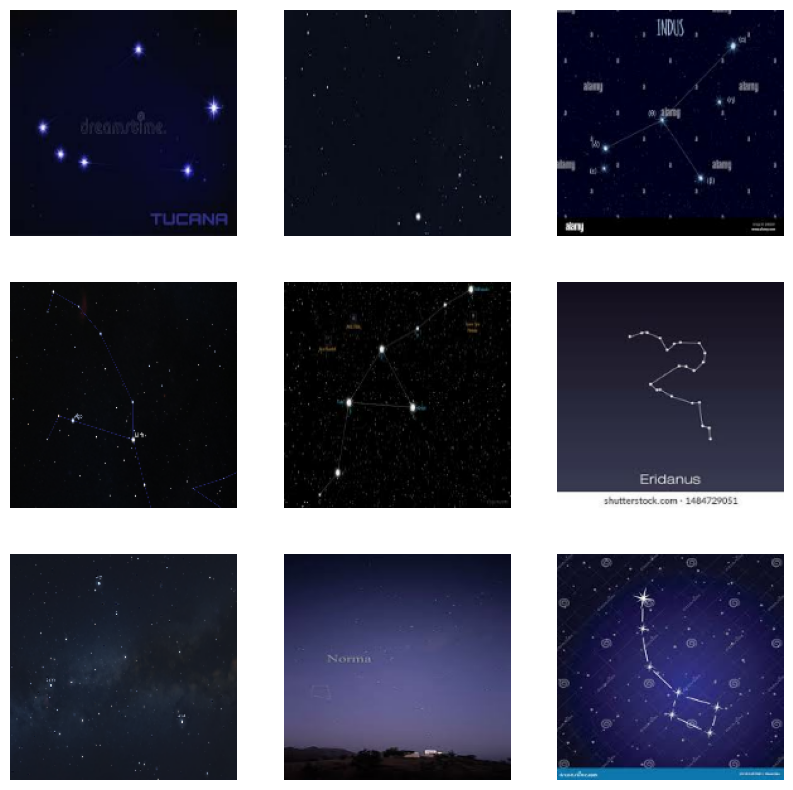

In [11]:
#this is use to show every folder image in short format
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.axis('off')

In [12]:
data_star = data_train.class_names

In [13]:
data_star

['Andromeda',
 'Antlia',
 'Apus',
 'Aquarius',
 'Aquila',
 'Ara',
 'Aries',
 'Auriga',
 'Boötes',
 'Caelum',
 'Camelopardalis',
 'Cancer',
 'Canes Venatici',
 'Canis Major',
 'Capricornus',
 'Carina',
 'Cassiopeia',
 'Centaurus',
 'Chamaeleon',
 'Columba',
 'Corona Borealis',
 'Corvus',
 'Crater',
 'Crux',
 'Cygnus',
 'Delphinus',
 'Dorado',
 'Draco',
 'Equuleus',
 'Eridanus',
 'Fornax',
 'Gemini',
 'Grus',
 'Hercules',
 'Horologium',
 'Hydra',
 'Hydrus',
 'Indus',
 'Lacerta',
 'Leo ',
 'Lepus ',
 'Libra',
 'Lupus',
 'Lyra ',
 'Mensa',
 'Microscopium',
 'Monoceros',
 'Musca',
 'Norma',
 'Octans',
 'Ophiuchus',
 'Orion',
 'Pavo',
 'Pegasus',
 'Perseus',
 'Phoenix',
 'Pictor',
 'Piscis Austrinus',
 'Puppis',
 'Pyxis',
 'Reticulum',
 'Sagitta',
 'Sagittarius',
 'Scorpius',
 'Sculptor',
 'Scutum',
 'Serpens',
 'Sextans',
 'SummerTriangle',
 'Taurus',
 'Telescopium',
 'Triangulum Australe',
 'Tucana',
 'Ursa Minor',
 'UrsaMajor',
 'Vela',
 'Virgo',
 'Volans',
 'Vulpecula']

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten

# Rebuild the model with an input shape of (180, 180, 3)
model = Sequential()
model.add(Input(shape=(180, 180, 3)))
# Add the rest of your model layers here


In [16]:
# #create layers for sequential model
# model = Sequential([
#     layers.Rescaling(1./255),
#     layers.Conv2D(16, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(32,3, padding='same',activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Conv2D(64, 3, padding='same', activation='relu'),
#     layers.MaxPooling2D(),
#     layers.Flatten(),
#     layers.Dropout(0.2),
#     layers.Dense(128),
#     layers.Dense(len(data_star))

# ])
model = Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),  # Specify input shape
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),  # Activation added here
    layers.Dense(len(data_star), activation='softmax')  # Use softmax for classification
])

/opt/anaconda3/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [18]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25


/opt/anaconda3/lib/python3.9/site-packages/keras/src/backend/tensorflow/nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.0109 - loss: 4.4071 - val_accuracy: 0.0505 - val_loss: 4.3207
Epoch 2/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 194ms/step - accuracy: 0.0360 - loss: 4.2800 - val_accuracy: 0.2176 - val_loss: 4.0036
Epoch 3/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 198ms/step - accuracy: 0.2211 - loss: 3.8336 - val_accuracy: 0.4462 - val_loss: 2.7504
Epoch 4/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.4741 - loss: 2.5085 - val_accuracy: 0.7099 - val_loss: 1.5863
Epoch 5/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 192ms/step - accuracy: 0.6918 - loss: 1.4838 - val_accuracy: 0.8484 - val_loss: 0.7798
Epoch 6/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 204ms/step - accuracy: 0.8188 - loss: 0.8601 - val_accuracy: 0.9209 - val_loss: 0.5352
Epoch 7/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 244ms/step - accuracy: 0.9040 - loss: 0.5333 - val_accuracy: 0.9582 - val_loss: 0.2901
Epoch 8/25
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 208ms/step - accuracy: 0.9152 - loss: 0.4030 - val_accuracy: 0.9802 - val_

Text(0.5, 1.0, 'Loss')

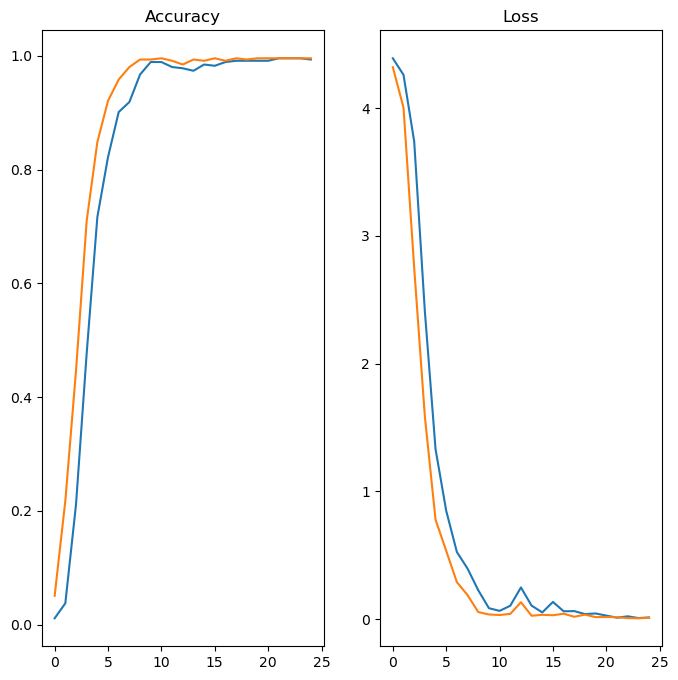

In [19]:
#show the graph of accuracy and loss
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [20]:
#convert the array into image
image = 'Train/Aquarius/aquarius-constellation.webp'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [21]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [22]:
score = tf.nn.softmax(predict)

In [23]:
print('the constellation is  {} with accuracy of {:0.2f}'.format(data_star[np.argmax(score)],np.max(score)*100))

the constellation is  Cancer with accuracy of 3.13


In [ ]:

model.save("constellation_model.h5")